# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [61]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from panel.interact import interact
import os
from pathlib import Path
from dotenv import load_dotenv

In [62]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [63]:
# Import the necessary CSVs to Pandas DataFrames
file_path = Path("C:/Users/susan/Unit-6-Pythonic Monopoly/Instructions/Starter_Code/Data/sfo_neighborhoods_census_data.csv")

In [64]:
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [65]:
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [66]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    df_housing_units = sfo_data['housing_units'].groupby(sfo_data.index).mean()
    
    fig_housing_units = plt.figure()
    plot_housing_units = df_housing_units.plot.bar()
    plot_housing_units.set_xlabel("Year")
    plot_housing_units.set_ylabel("Housing Units")
    plot_housing_units.set_title("Housing Units in San Francisco from 2010 - 2016", fontweight="bold")
    plt.close(fig_housing_units)
    return pn.pane.Matplotlib(fig_housing_units)
    

In [67]:
def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    df_avg_costs = sfo_data[["sale_price_sqr_foot","gross_rent"]].groupby(sfo_data.index).mean()
    
    fig = plt.figure()
    linechart = df_avg_costs["gross_rent"].plot()
    linechart.set_xlabel("Year")
    linechart.set_ylabel("Gross Rentt")
    linechart.set_title("Average Gross Rent in San Francisco", fontweight="bold")
    plt.close(fig)
    return pn.pane.Matplotlib(fig)

Matplotlib(Figure)
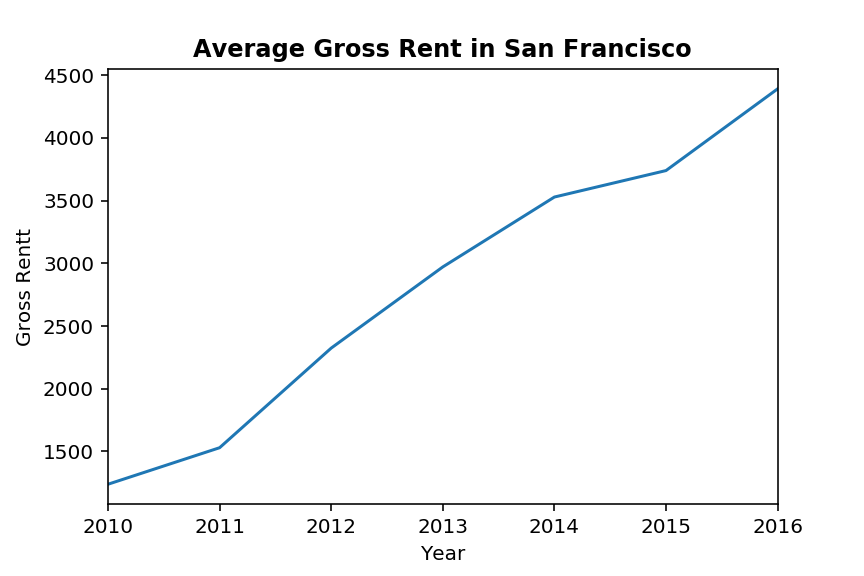

In [68]:
average_gross_rent()

In [85]:
def average_sales_price():
    """Average Sales Price Per Year."""
    df_avg_costs = sfo_data[["sale_price_sqr_foot","gross_rent"]].groupby(sfo_data.index).mean()
    
    fig = plt.figure()
    linechart2 = df_avg_costs["sale_price_sqr_foot"].plot()
    linechart2.set_xlabel("Year")
    linechart2.set_ylabel("Housing Units")
    linechart2.set_title("Housing Units in San Francisco from 2010 - 2016", fontweight="bold")
    plt.close(fig)
    return pn.pane.Matplotlib(fig)

In [70]:
def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    df_costs = sfo_data.groupby([sfo_data.index,"neighborhood"]).mean()
    df_costs.reset_index(inplace=True)
    sale_price_curve = df_costs.hvplot.line("year","sale_price_sqr_foot",xlabel="Year",ylabel="Avg Sale Price Per Square Foot",groupby="neighborhood")
    return sale_price_curve

In [71]:
def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    
    expensive_neighborhoods = sfo_data.groupby("neighborhood").mean()
    expensive_neighborhoods = expensive_neighborhoods.sort_values(by="sale_price_sqr_foot",ascending=False).head(10)
    expensive_neighborhoods.reset_index(inplace=True)
    expensive_neighborhoods_plot = expensive_neighborhoods.hvplot.bar("neighborhood","sale_price_sqr_foot",xlabel="Neighborhoods",ylabel="Avg Sale Price Per Square Foot",rot=90,height=500,title="Top Ten Expensive Neighborhoods")
    return expensive_neighborhoods_plot

In [72]:
def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""
    
    df_costs = sfo_data.groupby([sfo_data.index,"neighborhood"]).mean()
    df_costs.reset_index(inplace=True)
    figure = df_costs.hvplot.bar("year",["gross_rent","sale_price_sqr_foot"],xlabel="Year",ylabel="US Dollars",groupby="neighborhood",rot=90,height=500)
    return figure

In [73]:
def parallel_coordinates():
    """Parallel Coordinates Plot."""

In [74]:
def parallel_categories():
    """Parallel Categories Plot."""

In [91]:
def neighborhood_map():
    """Neighborhood Map."""
    df_all_neighborhoods = sfo_data.groupby("neighborhood").mean()
    df_all_neighborhoods.reset_index(inplace=True)
    df_all_neighborhoods.rename(columns={'neighborhood':'Neighborhood'},inplace=True)
    
    df_all_neighborhoods = pd.merge(df_all_neighborhoods,df_neighborhood_locations,on="Neighborhood",how='inner')
    
    neighborhoods_map = px.scatter_mapbox(
        df_all_neighborhoods,
        lat="Lat",
        lon="Lon",
        size="sale_price_sqr_foot",
        color="gross_rent",
        color_continuous_scale=px.colors.cyclical.IceFire,
        size_max=15,
        zoom=10,
        hover_name="Neighborhood",
        title="Average Sale Price Per Square Foot and Gross Rent in San Francisco",
    )
    plotly_panel = pn.pane.Plotly(neighborhoods_map)
    plotly_panel._updates = True
    return plotly_panel

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [98]:
# Create a Title for the Dashboard
title = pn.pane.Markdown(
"""
# Dashboard Ttile
""",
    width=800,
)

welcome = pn.pane.Markdown(
"""
# Real Estate Analysis of San Francisco
""")
# Create a tab layout for the dashboard
tabs = pn.Tabs(
    ("Welcome", pn.Column(welcome, neighborhood_map())),
    ("Yearly Market Analysis", pn.Row(housing_units_per_year(),average_gross_rent(),average_sales_price())),
    ("Neighborhood Analysis", pn.Column(average_price_by_neighborhood(), top_most_expensive_neighborhoods(), most_expensive_neighborhoods_rent_sales()),)
)


# Create the dashboard
dashboard = pn.Column(pn.Row(title), tabs, width=1000)

## Serve the Panel Dashboard

Column(width=1000)
    [0] Row
        [0] Markdown(str, width=800)
    [1] Tabs
        [0] Column
            [0] Markdown(str)
            [1] Plotly(Figure)
        [1] Row
            [0] Matplotlib(Figure)
            [1] Matplotlib(Figure)
            [2] Matplotlib(Figure)
        [2] Column
            [0] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                    [1] VSpacer()
            [1] HoloViews(Bars)
            [2] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                    [1] VSpacer()
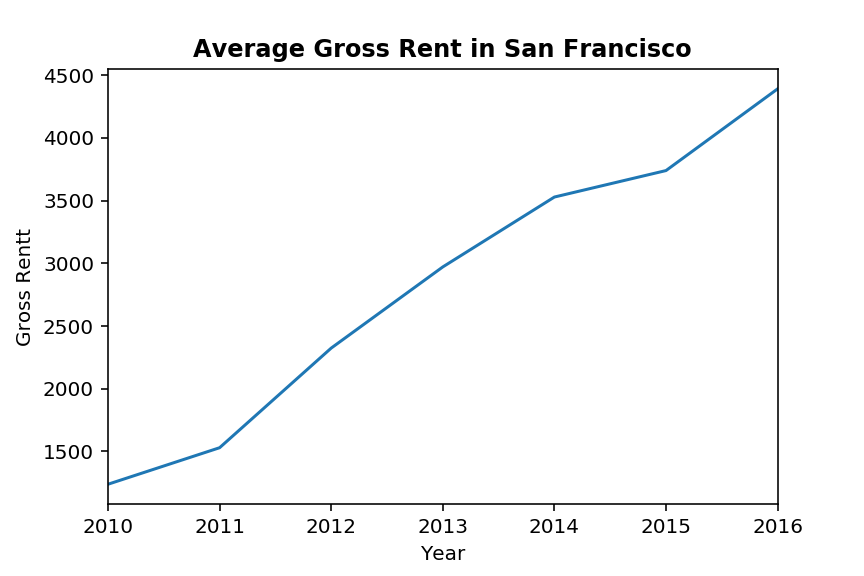
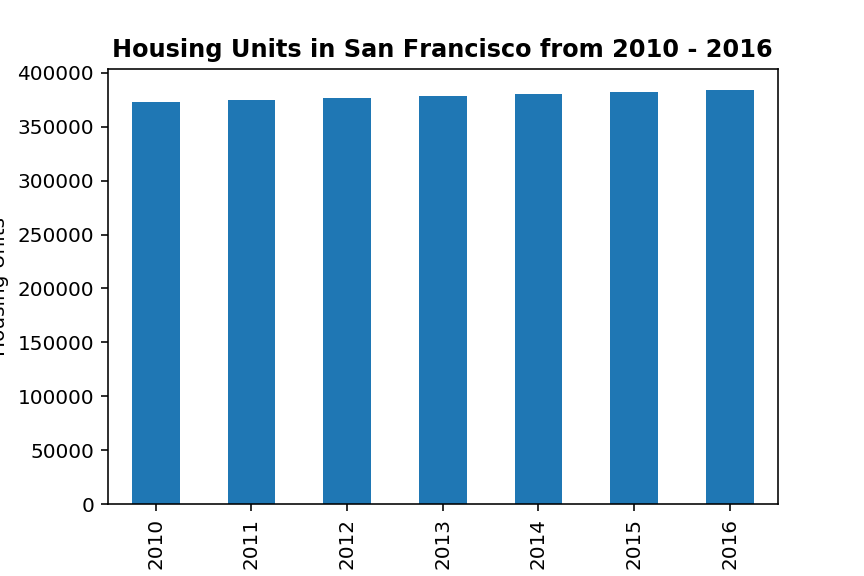
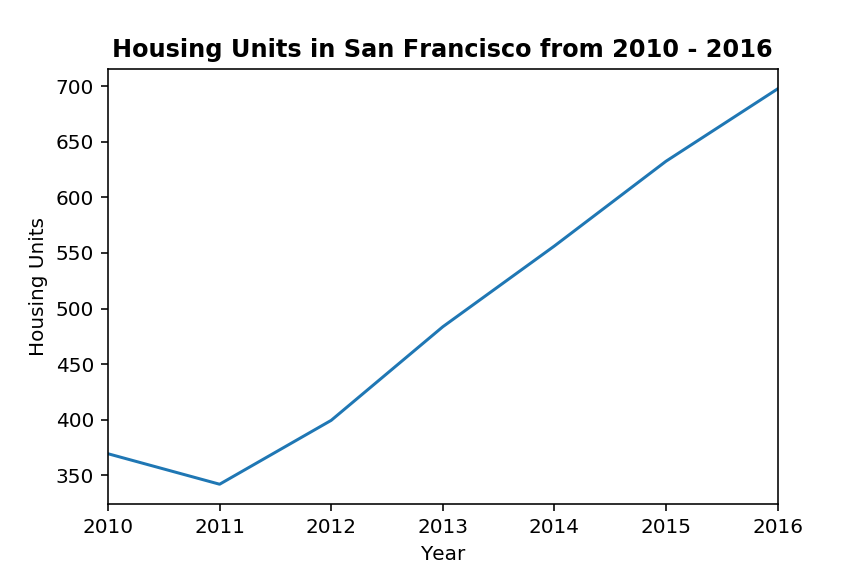

In [99]:
# Serve the# dashboard
dashboard.servable()

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [ ]:
# housing_units_per_year()

In [ ]:
# average_gross_rent()

In [ ]:
# average_sales_price()

In [ ]:
# average_price_by_neighborhood()

In [ ]:
# top_most_expensive_neighborhoods()

In [ ]:
# most_expensive_neighborhoods_rent_sales()

In [ ]:
# neighborhood_map().show()

In [ ]:
# parallel_categories()

In [ ]:
# parallel_coordinates()

In [ ]:
# sunburst()